# Examples of Turing Machines


You may wish to watch this video and then play with TM definitions.

You may also wish to convert some "old fashioned" TMs (created before
automd was designed) to the automd markdown syntax.


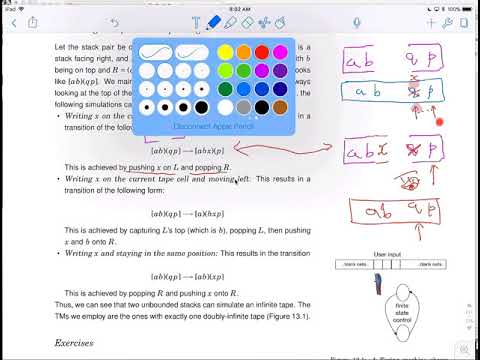

In [1]:
# This Youtube video walks through this notebook
from IPython.display import YouTubeVideo
YouTubeVideo('E1X8OTWUxJ0')

# Turing Machines

In [2]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
import sys

# -- Detect if in Own Install or in Colab
try:
    import google.colab
    OWN_INSTALL = False
except:
    OWN_INSTALL = True

if OWN_INSTALL:

  #---- Leave these definitions ON if running on laptop
  #---- Else turn OFF by putting them between ''' ... '''

  sys.path[0:0] = ['../../../../..',  '../../../../../3rdparty',
                   '../../../..',  '../../../../3rdparty',
                   '../../..',     '../../../3rdparty',
                   '../..',        '../../3rdparty',
                   '..',           '../3rdparty' ]

else: # In colab
  ! if [ ! -d Jove ]; then git clone https://github.com/ganeshutah/Jove Jove; fi
  sys.path.append('./Jove')
  sys.path.append('./Jove/jove')

# -- common imports --
from jove.Def_TM     import *
from jove.Def_md2mc  import *
from jove.DotBashers import *
from jove.JoveEditor import *
from jove.AnimateTM import * #-- usage: AnimateTM(whas101DTM, FuseEdges=True)
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Cloning into 'Jove'...
remote: Enumerating objects: 6728, done.
remote: Counting objects: 100% (2094/2094), done.
remote: Compressing objects: 100% (842/842), done.
remote: Total 6728 (delta 1276), reused 1951 (delta 1171), pack-reused 4634 (from 1)
Receiving objects: 100% (6728/6728), 10.59 MiB | 11.44 MiB/s, done.
Resolving deltas: 100% (4281/4281), done.
You may use any of these help commands:
help(step_tm)
help(run_tm)
help(explore_tm)

You may use any of these help commands:
help(md2mc)
.. and if you want to dig more, then ..
help(default_line_attr)
help(length_ok_input_items)
help(union_line_attr_list_fld)
help(extend_rsltdict)
help(form_delta)
help(get_machine_components)

You may use any of these help commands:
help(ResetStNum)
help(NxtStateStr)

 "help(JoveEditor)" gives you info on the generic animation panel that animates all machines. 


# Various DTMs and NDTMs below

Generating LALR tables


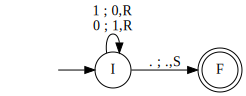

In [3]:
flipperTM = md2mc('''TM
I : . ; ., S -> F
I : 0 ; 1, R -> I
I : 1 ; 0, R -> I
''')
DOflipperTM = dotObj_tm(flipperTM, FuseEdges=True)
DOflipperTM


In [4]:
explore_tm(flipperTM, "001001", 100)

Allocating  8  tape cells to the RIGHT!
Detailing the halted configs now.
Accepted at  ('F', 6, '110110........', 93)
 via .. 
 ->('I', 0, '001001', 100)
 ->('I', 1, '101001', 99)
 ->('I', 2, '111001', 98)
 ->('I', 3, '110001', 97)
 ->('I', 4, '110101', 96)
 ->('I', 5, '110111', 95)
 ->('I', 6, '110110', 94)
 ->('F', 6, '110110........', 93)


In [5]:
help(explore_tm)

Help on function explore_tm in module jove.Def_TM:

explore_tm(T, tape, nsteps)
    A handy routine to print the result of run_tm plus making 
    future extensions to explore run-results.



In [6]:
# The following display(...) call is needed to see the animation buttons in Colab
display(HTML('<link rel="stylesheet" href="//stackpath.bootstrapcdn.com/font-awesome/4.7.0/css/font-awesome.min.css"/>'))
AnimateTM(flipperTM, FuseEdges=True)

# Here is a broken copy-tape TM -- please fix interactively in class
## Attempted algorithm

* Start with a tape containing things like 10# or 0# or simply #
* Blanks on either side
* Copy state:
* When at leftmost, if #, restore "damage" (was supposed not to play with 0's and 1's to left of #).
* Restore them, sweeping left till blank is hit. Then swing right and stop!
* When at leftmost, if 0, change to A, going to state "deposit 0"
* And if 1, change to B, going to state "deposit 1"
* In the deposit 0/1 state, keep going right till #, moving past 0's and 1's
* Move past # and then move past previously deposited 0's and 1's till . (blank)
* Deposit the thing promised
* Move back past 0's and 1's till #, then move past (still L) till A/B hit
* Swing right
* Goto Copy

In [17]:
ww_dtm = md2mc('''TM

I : # ; #,S -> F
I : 0 ; 0, S | 1 ; 1, S -> Copy

Copy: 0 ; A , R -> Move_Zero
Copy: 1 ; B , R -> Move_One

!! left of #
Move_Zero : 0 ; 0 , R | 1 ; 1 , R -> Move_Zero

!! left of #
Move_One  : 1 ; 1 , R | 1 ; 1 , R -> Move_One  !!

!! Found first milepost, ready to look for blank
Move_Zero : # ; # , R -> MZ_find_blank

!! Found first milepost, ready to look for blank
Move_One : # ; # , R -> MO_find_blank

MZ_find_blank:  . ; 0, L ->  !! !! end of journey - what next?

MZ_find_blank:  0 ; 0, R -> MZ_find_blank
MZ_find_blank:  1 ; 1, R -> MZ_find_blank


MO_find_blank:  0 ; 0, R -> MO_find_blank
MO_find_blank:  1 ; 1, R -> MO_find_blank

MO_find_blank:  . ; 1, L -> CopyMore

CopyMore : # ; # , L -> CopyMore1

CopyMore : 0 ; 0 , L | 1 ; 1 , L -> CopyMore

CopyMore1 : 0 ; 0 , L | 1 ; 1 , L -> CopyMore1

CopyMore1 : A ; A , R | B ; B , R -> MoreToCopy?


MoreToCopy? : 0 ; 0 , S | 1 ; 1 , S -> Copy

MoreToCopy? : # ; # , L -> Restore

Restore : . ; . , R -> FDone

Restore : A ; 0 , L | B ; 1 , L -> Restore

''')
dotObj_tm(ww_dtm, FuseEdges=True)
# !! !! Copymore

Syntax error at ':'  on line  15
Your are hosed due to a syntax error!


ValueError: not enough values to unpack (expected 9, got 5)

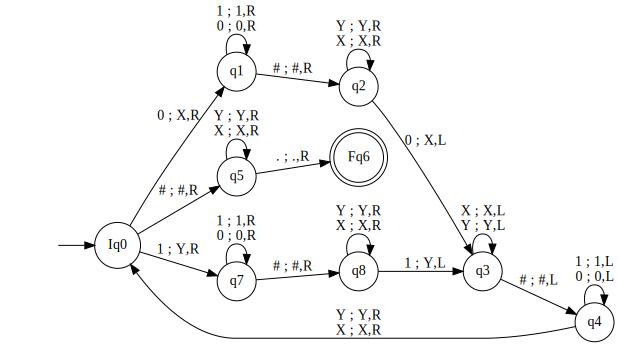

In [7]:
wpw_tm = md2mc(
'''
TM
!!---------------------------------------------------------------------------
!! This is a DTM for recognizing strings of the form w#w where w is in {0,1}*
!! The presence of the "#" serves as the midpoint-marker, thus allowing the
!! TM to deterministically match around it.
!!
!!---------------------------------------------------------------------------

!!---------------------------------------------------------------------------
!! State : rd ; wr , mv -> tostates !! comment
!!---------------------------------------------------------------------------

Iq0     : 0  ; X  , R  -> q1      !! All 0s are converted to X, and matching
	       	       	  	  !! 0s are then sought to the right of the #

Iq0     : 1  ; Y  , R  -> q7      !! All 1s are converted to Y, and matching
	       	       	  	  !! 1s are then sought to the right of the #

Iq0     : #  ; #  , R  -> q5      !! If we see # rightaway, we are in the
	       	       	  	  !! situation of having to match eps # eps

!!---
q5	: X ; X,R | Y ; Y,R -> q5 !! In q5, we skip over X and Y (an equal number
	      	      	       	  !! of X and Y lie to the left of the #)

q5      : .  ; .  , R  -> Fq6	  !! .. and we accept when we see a blank (.)
!!---

q1      : 0 ; 0,R | 1 ; 1,R -> q1 !! In q1, skip over the remaining 0s and 1s

q1      : #  ; #  , R  -> q2      !! But upon seeing a #, look for a matching
	       	       	  	  !! 0 (since we are in q2, we know this).

q2      : X ; X,R | Y ; Y,R -> q2 !! All X and Y are "past stuff" to skip over

q2      : 0  ; X  , L  -> q3      !! When we find a matching 0, turn that to
	       	       	  	  !! an X, and sweep left to do the next pass

q3      : X ; X,L | Y ; Y,L -> q3 !! In q3, we move over all past X, Y

q3      : #  ; #  , L  -> q4      !! but when we reach the middle marker, we
	       	       	  	  !! know that the next action is to seek the
				  !! next unprocessed 0 or 1

q4      : 0 ; 0,L | 1 ; 1,L -> q4 !! In q4, wait till we hit the leftmost 0/1

q4      : X ; X,R | Y ; Y,R -> Iq0 !! When we hit an X or Y, we know that we've
 	       	       	           !! found the leftmost 0/1. Another pass begins.

!!---
q7      : 0 ; 0,R | 1 ; 1,R -> q7 !! q7 is similar to q1

q7      : #  ; #  , R  -> q8      !! and q8 is similar to q2

q8      : X ; X,R | Y ; Y,R -> q8

q8      : 1  ; Y  , L  -> q3



!!---------------------------------------------------------------------------
!! You may use the line below as an empty shell to populate for your purposes
!! Also serves as a syntax reminder for entering DFAs.
!!
!! State : r1 ; w1 , m1 | r2 ; w2 , m2 -> s1 , s2   !! comment
!!
!! ..    : .. ; .. , .. | .. ; .. , .. -> .. , ..  !!  ..
!!---------------------------------------------------------------------------
!!
!! Good commenting and software-engineering methods, good clean indentation,
!! grouping of similar states, columnar alignment, etc etc. are HUGELY
!! important in any programming endeavor -- especially while programming
!! automata. Otherwise, you can easily make a mistake in your automaton
!! code. Besides, you cannot rely upon others to find your mistakes, as
!! they will find your automaton code impossible to read!
!!
!!---------------------------------------------------------------------------

'''

)

dotObj_tm(wpw_tm, FuseEdges = True)

In [8]:
DOwpw = dotObj_tm(wpw_tm, FuseEdges = True)

In [9]:
explore_tm(wpw_tm, "001#001", 120)

Allocating  8  tape cells to the RIGHT!
Detailing the halted configs now.
Accepted at  ('Fq6', 8, 'XXY#XXY........', 88)
 via .. 
 ->('Iq0', 0, '001#001', 120)
 ->('q1', 1, 'X01#001', 119)
 ->('q1', 2, 'X01#001', 118)
 ->('q1', 3, 'X01#001', 117)
 ->('q2', 4, 'X01#001', 116)
 ->('q3', 3, 'X01#X01', 115)
 ->('q4', 2, 'X01#X01', 114)
 ->('q4', 1, 'X01#X01', 113)
 ->('q4', 0, 'X01#X01', 112)
 ->('Iq0', 1, 'X01#X01', 111)
 ->('q1', 2, 'XX1#X01', 110)
 ->('q1', 3, 'XX1#X01', 109)
 ->('q2', 4, 'XX1#X01', 108)
 ->('q2', 5, 'XX1#X01', 107)
 ->('q3', 4, 'XX1#XX1', 106)
 ->('q3', 3, 'XX1#XX1', 105)
 ->('q4', 2, 'XX1#XX1', 104)
 ->('q4', 1, 'XX1#XX1', 103)
 ->('Iq0', 2, 'XX1#XX1', 102)
 ->('q7', 3, 'XXY#XX1', 101)
 ->('q8', 4, 'XXY#XX1', 100)
 ->('q8', 5, 'XXY#XX1', 99)
 ->('q8', 6, 'XXY#XX1', 98)
 ->('q3', 5, 'XXY#XXY', 97)
 ->('q3', 4, 'XXY#XXY', 96)
 ->('q3', 3, 'XXY#XXY', 95)
 ->('q4', 2, 'XXY#XXY', 94)
 ->('Iq0', 3, 'XXY#XXY', 93)
 ->('q5', 4, 'XXY#XXY', 92)
 ->('q5', 5, 'XXY#XXY', 91)
 ->('

In [10]:
# The following display(...) call is needed to see the animation buttons in Colab
display(HTML('<link rel="stylesheet" href="//stackpath.bootstrapcdn.com/font-awesome/4.7.0/css/font-awesome.min.css"/>'))

#---SET FUEL TO 100 OR SO, else there will be no animation shown---
AnimateTM(wpw_tm, FuseEdges=True)



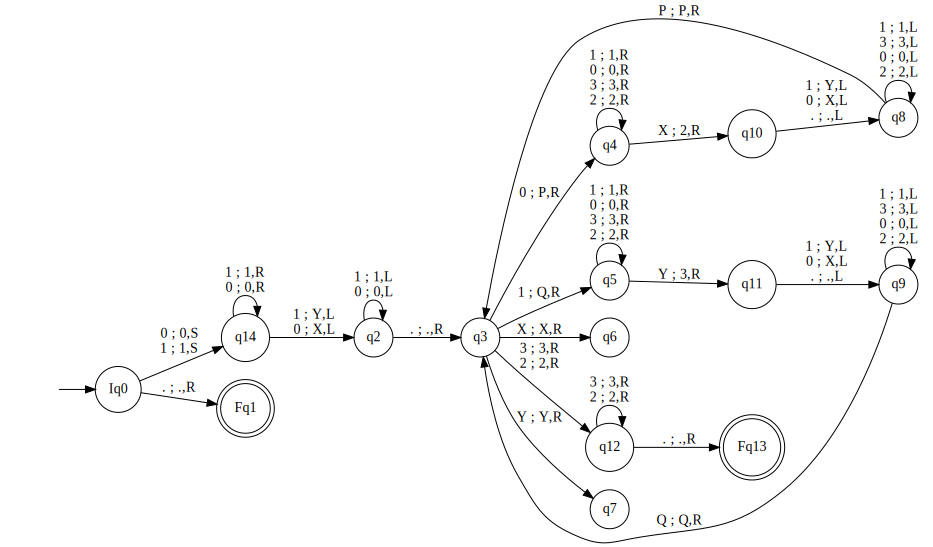

In [11]:
wwndtm_md = md2mc(

'''
TM
!!---------------------------------------------------------------------------
!! This is a TM for ww processing. Guesses midpoint using nondet.
!!
!!---------------------------------------------------------------------------

!!---------------------------------------------------------------------------
!! State : rd ; wr , mv -> tostates !! comment
!!---------------------------------------------------------------------------

Iq0     : 0  ; 0  , S  -> q14      !! This simulates the TM taking a guess
Iq0     : 1  ; 1  , S  -> q14      !! that it hasn't seen the midpoint. It
                                   !! moves to q14

Iq0     : .  ; .  , R  -> Fq1      !! yay! shortest acceptance is for eps eps
	                           !! i.e. facing a sea of blanks that encodes
				   !! an epsilon followed by another epsilon.

!!---------------------------------------------------------------------------

q14     : 0  ; 0 , R   -> q14      !! The TM skips over 0s or
				   !! 1s for a while, and then chooses a cell,

q14     : 0  ; X , L   -> q2       !! declaring it the midpoint, or more specifically
	       	       	  	   !! FIRST CHARACTER PAST MIDPOINT, by marking it 'X'
				   !! and then moves to q2 (to march around the
				   !! chosen midpoint).

q14     : 1  ; 1 , R   -> q14      !! Similar actions as with 0 in state q14,
q14     : 1  ; Y , L   -> q2       !! except that it "dings" the "1" with a "Y"
	       	       	  	   !! to mark it the FIRST CHARACTER PAST MIDPOINT.

                                   !! Then we march around it. While the separate
				   !! use of "X" and "Y" may not be necessary,
				   !! it improves understandability when you
				   !! finally see the result of TM executions.

q2      : 0  ; 0 , L   -> q2       !! The TM is now winding back, seeking the
q2      : 1  ; 1 , L   -> q2       !! left-end of the tape till hit hits a '.'
                                   !! (blank).

q2      : .  ; . , R   -> q3       !! When that happens, the TM goes to state q3
                                   !! to begin its work of "matching around."

				   !! We describe the q3,q5,q11,q9,q3 loop well.
				   !! The other loop q3,q4,q10,q8,q3 is similar.

!!-----------------------------------------------------------------

q3      : X ; X , R    -> q6       !! This state is a stuck state (no progress)
	      	       	  	   !! WE came to q3 because we dinged a 0->X
				   !! or a 1->Y while in q14; so its matching
				   !! "partner" 0 or 1 must be found to the
				   !! left. Unfortunately, we are finding an
				   !! X or a Y.  Thus, no "match around the middle"
				   !! is likely to happen.

q3      : Y ; Y , R    -> q7	   !! This state is ALSO a stuck state for similar
	      	       	  	   !! reasons as expressed in the comments
				   !! associated with q3 : X ; X ...

!!-----------------------------------------------------------------
!! Description of the q3,q5,q11,q9,q3 loop :

q3      : 1 ; Q , R    -> q5       !! Upon seeing a 1, change to Q. Then MUST see a
                                   !! matching Y, then change to 3, and go right, and to state q5.

				   !! We do this because 'Y' represents what
				   !! was '1' and got marked as midpoint (well,
				   !! one-past midpoint..).

!!-- What will happen in q5,q11,q9,q3 --

!! So we have to get past this assumed
!! midpoint and choose the next
!! "one past midpoint that has not been seen so far".

!! We enter q11 to then ding a matching
!! 0 to X or 1 to Y, moving left.

!! A blank sends us leftwards, as well.

!! We sweep left till we hit a Q. We MUST see a Q
!! because we entered "this lobe" by dinging a 1->Q.

!! The process repeats from state q3.



q5      : 0;0,R | 1;1,R | 2;2,R | 3;3,R -> q5  !! punt the 0/1/2/3; we need a "Y".

q5      : Y  ; 3, R               -> q11 !! ah-ha , got a Y. Ding to 3, seek 0/1/.

q11     : 1;Y,L | .;.,L | 0;X,L   -> q9  !! phew! got to sweep left now!

q9      : 0;0,L | 1;1,L | 2;2,L | 3;3,L -> q9  !! whee! going left!

q9      : Q ; Q , R                     -> q3  !! Boiinggg - now gonna go right!

!!-----------------------------------------------------------------
!! Description of the q3,q4,q10,q8,q3 loop :

q3      : 0 ; P , R    -> q4    !! This is similar to q3 : 1 ; Q , R -> q5 above


q4      : 0;0,R | 1;1,R | 2;2,R | 3;3,R -> q4  !! punt the 0/1/2/3; we need a "X".

q4      : X  ; 2, R               -> q10 !! ah-ha , got a X. Ding to 2, seek 0/1/.

q10     : 1;Y,L | .;.,L | 0;X,L   -> q8  !! phew! got to sweep left now!

q8      : 0;0,L | 1;1,L | 2;2,L | 3;3,L -> q8  !! whee! going left!

q8      : P ; P , R                     -> q3  !! Boiinggg - now gonna go right!

!!-----------------------------------------------------------------

q3      : 2;2,R | 3;3,R -> q12     !! Seeing every sign of acceptance!!

				   !! We are seeing piles of 2 and 3
				   !! ALSO did not get stuck in q6 or q7
				   !! That means all the matches went fine

q12     : 2 ; 2 , R | 3 ; 3 , R -> q12 !! Skip over piles of past 2s and 3s

q12     : . ; . , R     -> Fq13    !! Yay, acceptance when we hit a blank!


!!---------------------------------------------------------------------------
!! You may use the line below as an empty shell to populate for your purposes
!! Also serves as a syntax reminder for entering DFAs.
!!
!! State : r1 ; w1 , m1 | r2 ; w2 , m2 -> s1 , s2   !! comment
!!
!! ..    : .. ; .. , .. | .. ; .. , .. -> .. , ..  !!  ..
!!---------------------------------------------------------------------------
!!
!! Good commenting and software-engineering methods, good clean indentation,
!! grouping of similar states, columnar alignment, etc etc. are HUGELY
!! important in any programming endeavor -- especially while programming
!! automata. Otherwise, you can easily make a mistake in your automaton
!! code. Besides, you cannot rely upon others to find your mistakes, as
!! they will find your automaton code impossible to read!
!!
!!---------------------------------------------------------------------------


'''

)

dotObj_tm(wwndtm_md, FuseEdges=True)

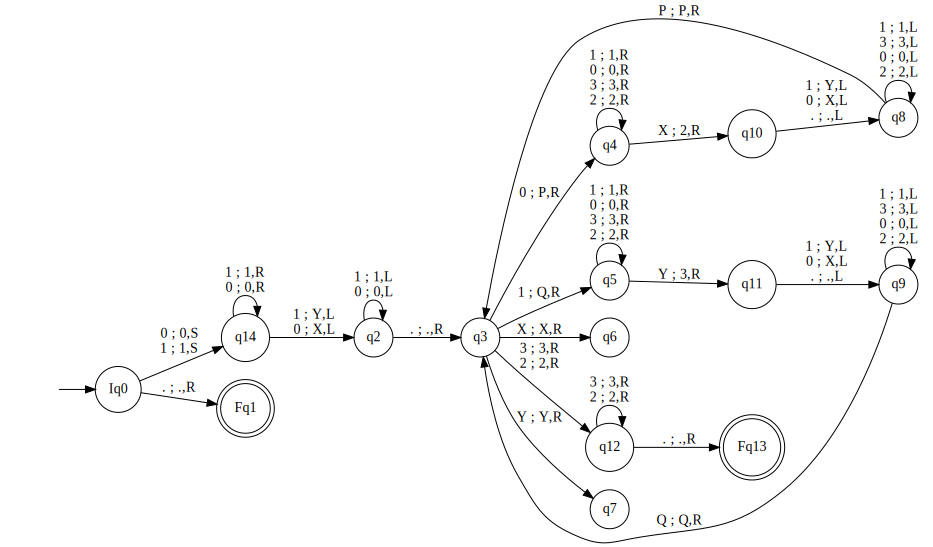

In [12]:
DOwwndtm = dotObj_tm(wwndtm_md, FuseEdges=True)
DOwwndtm

In [13]:
explore_tm(wwndtm_md, "001001", 170)

Allocating  8  tape cells to the LEFT!
Allocating  8  tape cells to the LEFT!
Allocating  8  tape cells to the LEFT!
Allocating  8  tape cells to the RIGHT!
Allocating  8  tape cells to the LEFT!
Allocating  8  tape cells to the RIGHT!
Allocating  8  tape cells to the LEFT!
Allocating  8  tape cells to the LEFT!
Detailing the halted configs now.
Rejected at  ('q6', 9, '........X01001', 166)
 via .. 
 ->('Iq0', 0, '001001', 170)
 ->('q14', 0, '001001', 169)
 ->('q2', 7, '........X01001', 168)
 ->('q3', 8, '........X01001', 167)
 ->('q6', 9, '........X01001', 166)
Rejected at  ('q12', 10, '........P2Y001', 159)
 via .. 
 ->('Iq0', 0, '001001', 170)
 ->('q14', 0, '001001', 169)
 ->('q14', 1, '001001', 168)
 ->('q2', 0, '0X1001', 167)
 ->('q2', 7, '........0X1001', 166)
 ->('q3', 8, '........0X1001', 165)
 ->('q4', 9, '........PX1001', 164)
 ->('q10', 10, '........P21001', 163)
 ->('q8', 9, '........P2Y001', 162)
 ->('q8', 8, '........P2Y001', 161)
 ->('q3', 9, '........P2Y001', 160)
 ->('

In [14]:
#---SET FUEL TO 100 OR SO, else there will be no animation shown---
AnimateTM(wwndtm_md, FuseEdges=True)
